<a href="https://colab.research.google.com/github/Amit-95/Online_retail_Customer_segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Customer Segmentation. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

# IMPORT LIBRARIES AND DATA

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import Online Retail Data containing transactions from 01/12/2010 and 09/12/2011
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Customer_segmentation/Online Retail.xlsx - Online Retail.csv")

**First Look**

In [4]:
# Fisrt 5 values.
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [5]:
# Last 5 values.
data.tail()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


In [6]:
#shape of data
data.shape

(541909, 8)

In [7]:
# Check for duplicated entries.
print("Duplicate entry in data:",len(data[data.duplicated()]))

Duplicate entry in data: 5268


In [8]:
# Removing Duplicate Entries 
duplicate_data = data[data.duplicated(keep = 'last')]
duplicate_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/10 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/10 11:45,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/10 11:45,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/10 11:45,2.95,17908.0,United Kingdom
548,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/10 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541640,581538,22992,REVOLVER WOODEN RULER,1,12/9/11 11:34,1.95,14446.0,United Kingdom
541644,581538,22694,WICKER STAR,1,12/9/11 11:34,2.10,14446.0,United Kingdom
541646,581538,23275,SET OF 3 HANGING OWLS OLLIE BEAK,1,12/9/11 11:34,1.25,14446.0,United Kingdom
541656,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/11 11:34,2.49,14446.0,United Kingdom


In [9]:
# Custom Function for Dtype,Unique values and Null values
def datainfo():
    temp_ps = pd.DataFrame(index=data.columns)
    temp_ps['DataType'] = data.dtypes
    temp_ps["Non-null_Values"] = data.count()
    temp_ps['Unique_Values'] = data.nunique()
    temp_ps['NaN_Values'] = data.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(data))*100 
    return temp_ps

In [10]:
# Shape of the data.
print("Total Rows and Columns in DataFrame is :",data.shape,"\n") 
# Custom Function
datainfo()

Total Rows and Columns in DataFrame is : (541909, 8) 



,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
InvoiceNo,object,541909,25900,0,0.000000
StockCode,object,541909,4070,0,0.000000
Description,object,540455,4223,1454,0.268311
Quantity,int64,541909,722,0,0.000000
InvoiceDate,object,541909,23260,0,0.000000
UnitPrice,float64,541909,1630,0,0.000000
CustomerID,float64,406829,4372,135080,24.926694
Country,object,541909,38,0,0.000000


In [11]:
# Statistical info.
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
InvoiceNo,541909,25900,573585,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,541909,4070,85123A,2313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,541909.0,NaN,NaN,NaN,9.55225,218.081158,-80995.0,1.0,3.0,10.0,80995.0
InvoiceDate,541909,23260,10/31/11 14:41,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UnitPrice,541909.0,NaN,NaN,NaN,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,NaN,NaN,NaN,15287.69057,1713.600303,12346.0,13953.0,15152.0,16791.0,18287.0
Country,541909,38,United Kingdom,495478,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Quantity and Unitprice can never be a Negative value

In [12]:
# Filter out records with negative values
data = data[data['Quantity']>0]
data = data[data['UnitPrice']>0]

In [13]:
#Customer distribution by country
cust_data=data.groupby("Country")["CustomerID"].count().reset_index().sort_values('CustomerID', ascending=False)
print(cust_data)

                 Country  CustomerID
36        United Kingdom      354321
14               Germany        9040
13                France        8341
10                  EIRE        7236
31                 Spain        2484
24           Netherlands        2359
3                Belgium        2031
33           Switzerland        1841
27              Portugal        1462
0              Australia        1182
25                Norway        1071
19                 Italy         758
6        Channel Islands         748
12               Finland         685
7                 Cyprus         614
32                Sweden         451
1                Austria         398
9                Denmark         380
26                Poland         330
20                 Japan         321
18                Israel         248
37           Unspecified         244
30             Singapore         222
17               Iceland         182
34                   USA         179
5                 Canada         151
1

In [14]:
# Keep only United Kingdom data
data = data[data["Country"] == 'United Kingdom']

In [15]:
#Check for missing values in the dataset
data.isnull().sum(axis=0)

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     130802
Country             0
dtype: int64

In [16]:
#Remove missing values from CustomerID column, can ignore missing values in description column
data = data[pd.notnull(data['CustomerID'])]

In [18]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [19]:
#Convert the string date field to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

#Add new column depicting total amount
data['TotalAmount'] = data['Quantity'] * data['UnitPrice']

In [20]:
#Check the shape (number of columns and rows) in the dataset after data is cleaned
data.shape

(354321, 9)

In [21]:
# Filter the columns
data=data[["CustomerID","InvoiceNo","InvoiceDate","TotalAmount","Country"]]

In [22]:
# Fisrt 5 values.
data.head()

,CustomerID,InvoiceNo,InvoiceDate,TotalAmount,Country
0,17850.0,536365,2010-12-01 08:26:00,15.30,United Kingdom
1,17850.0,536365,2010-12-01 08:26:00,20.34,United Kingdom
2,17850.0,536365,2010-12-01 08:26:00,22.00,United Kingdom
3,17850.0,536365,2010-12-01 08:26:00,20.34,United Kingdom
4,17850.0,536365,2010-12-01 08:26:00,20.34,United Kingdom


# RFM Modelling

In [23]:
#Recency = Latest Date - Last Inovice Data, 
#Frequency = count of invoice no. of transaction(s),
# Monetary = Sum of Total Amount for each customer

import datetime as dt
#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
RFMScores = data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days,
                                            'InvoiceNo': lambda x: len(x), 
                                            'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
RFMScores['InvoiceDate'] = RFMScores['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
RFMScores.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)
# Fisrt 5 values.
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4595,33719.73
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


In [24]:
# Function to create Histogram 
def Histogram(A):
    fig, ax = plt.subplots(figsize=(15,6),facecolor="#363336")
    ax.patch.set_facecolor('#8C8C8C')
    sns.histplot(data=RFMScores,kde=True, x=A,bins=25,ax=ax,color='red')
    ax.tick_params(axis='x', colors='#F5E9F5',labelsize=15) 
    ax.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
    ax.set_xlabel(A, color='#F5E9F5', fontsize=20)
    ax.set_ylabel("Counts",  color='#F5E9F5', fontsize=20)
    ax.set_title("Histogram", color='#F5E9F5', fontsize=30)
   

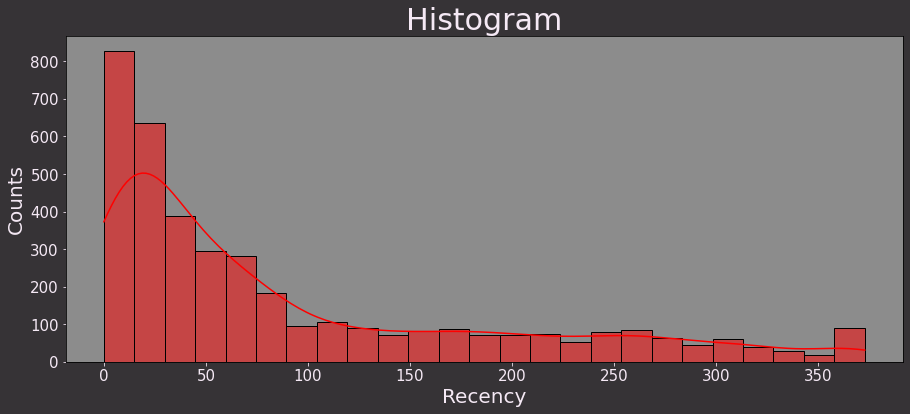

In [25]:
# Histogram for Recency
Histogram("Recency")